In [87]:
import matplotlib.pyplot as plt
import json
import seaborn as sns
import pandas as pd

file_coco = "/misc/lmbssd/saikiat/datasets/coco/annotations/instances_val2017.json"
file_cityscapes = "/misc/lmbraid19/mirfan/cityscapes-to-coco-conversion/data/cityscapes/annotations/instancesonly_filtered_gtFine_val_new.json"
a = open(file_coco, "r")
coco = json.load(a)

a = open(file_cityscapes, "r")
cityscapes = json.load(a)
city_dict = {}

def plot_histogram(dataset, savefile, include = None):
    city_dict = {}
    for cat in dataset["categories"]:
        city_dict[cat["id"]] = cat["name"]

    d = {}
    d["Category"] = []
    d["Area"] = []
    for ann in dataset["annotations"]:
        category_name = city_dict[ann["category_id"]]
        if include is not None and category_name not in include:
            continue
        d["Category"].append(category_name)
        # try:
        #     d["Area"].append(int(len(ann["segmentation"]["counts"])/2))
        # except:
        #     d["Area"].append(int(len(ann["segmentation"][0])/2))
        d["Area"].append(ann["bbox"][2] * ann["bbox"][3])

    df2 = pd.DataFrame(d)
    g = sns.FacetGrid(df2, col="Category", col_wrap=4, sharey=False)
    g.map(sns.histplot, "Area", log_scale=False)
    # sns.histplot(data=df2, hue = "Category", y = "Area", multiple = "dodge",log_scale=False)
    plt.savefig(savefile)


def plot_histogram_together(cityscapes, coco, savefile, include = None):
    city_dict = {}
    coco_dict = {}
    for cat in cityscapes["categories"]:
        city_dict[cat["id"]] = cat["name"]
    for cat in coco["categories"]:
        coco_dict[cat["id"]] = cat["name"]

    d = {}
    d["Dataset"] = []
    d["Category"] = []
    d["Area"] = []
    def get_data(data, dic, name):
        for ann in data["annotations"]:
            category_name = dic[ann["category_id"]]
            if include is not None and category_name not in include:
                continue
            d["Category"].append(category_name)
            try:
                d["Area"].append(int(len(ann["segmentation"]["counts"])/2))
            except:
                d["Area"].append(int(len(ann["segmentation"][0])/2))
            # d["Area"].append(ann["bbox"][2] * ann["bbox"][3])
            d["Dataset"] .append(name)
    
    get_data(cityscapes, city_dict, "Cityscapes")
    get_data(coco, coco_dict, "Coco")


    df2 = pd.DataFrame(d)
    g = sns.FacetGrid(df2, col="Category", col_wrap=4, sharey=False, sharex= False, hue = "Dataset", xlim=(0,1000))
    g.map(sns.histplot, "Area" , log_scale=False)
    g.add_legend()
    # sns.histplot(data=df2, hue = "Category", y = "Area", multiple = "dodge",log_scale=False)
    plt.savefig(savefile)

# plot_histogram(cityscapes, savefile = "/misc/student/mirfan/histograms/Area/cityscapes_bbox2*3")
# , include = ['rider', 'car', 'person', 'bicycle', 'bus', 'motorcycle', 'truck', 'train'])

# plot_histogram_together(cityscapes, coco, savefile = "/misc/student/mirfan/histograms/Area/together_len_seg", include = ['rider', 'car', 'person', 'bicycle', 'bus', 'motorcycle', 'truck', 'train'])


In [129]:

city_dict = {}
coco_dict = {}
city_id = {}
coco_id = {}
for cat in coco["categories"]:
    coco_dict[cat["id"]] = cat["name"]

for cat in cityscapes["categories"]:
    city_dict[cat["id"]] = cat["name"]
    
for cat in coco["images"]:
    coco_id[cat["id"]] = [cat["width"], cat["height"]]
for cat in cityscapes["images"]:
    city_id[cat["id"]] = [cat["width"], cat["height"]]


d = {}
d["Dataset"] = []
d["Category"] = []
d["x"] = []
d["y"] = []
d["Area"] = []
include = ['rider', 'car', 'person', 'bicycle', 'bus', 'motorcycle', 'truck', 'train']
def get_data(data, dic, name, id_dic):
    for ann in data["annotations"]:
        category_name = dic[ann["category_id"]]
        if include is not None and category_name not in include:
            continue
        d["Category"].append(category_name)
        d["x"].append(ann["bbox"][2])
        d["y"].append(ann["bbox"][3])
        d["Area"].append((ann["bbox"][2])*(ann["bbox"][3]))

        # d["Area"].append((ann["bbox"][2]/id_dic[ann["image_id"]][0])*(ann["bbox"][3]/id_dic[ann["image_id"]][1]))
        # d["x"].append((ann["bbox"][2]/id_dic[ann["image_id"]][0]))
        # d["y"].append((ann["bbox"][3]/id_dic[ann["image_id"]][1]))
        # if name =="Coc":
        #     d["Area"] = ann["bbox"][2]*ann["bbox"][3]
        # try:
        #     d["Area"].append(int(len(ann["segmentation"]["counts"])/2))
        # except:
        #     d["Area"].append(int(len(ann["segmentation"][0])/2))
        # d["Area"].append(ann["bbox"][2] * ann["bbox"][3])
        d["Dataset"] .append(name)

get_data(cityscapes, city_dict, "Cityscapes", city_id)
get_data(coco, coco_dict, "Coco",coco_id)


df3 = pd.DataFrame(d)
# g = sns.FacetGrid(df2[df2["Dataset"] == "Cityscapes"], col="Category", col_wrap=4, sharey=False, sharex= False, hue = "Dataset")
# g.map(sns.histplot, "y" , log_scale=False)
# g.add_legend()
# # sns.histplot(data=df2, hue = "Category", y = "Area", multiple = "dodge",log_scale=False)
# plt.show()
# # print(df2[df2["Dataset"] == "Cityscapes"].groupby(["Category"]).count()["Dataset"])
# df2 = pd.DataFrame(d)
# g = sns.FacetGrid(df2[df2["Dataset"] == "Coco"], col="Category", col_wrap=4, sharey=False, sharex= False, hue = "Dataset")
# g.map(sns.histplot, "y" , log_scale=False)
# g.add_legend()
# # sns.histplot(data=df2, hue = "Category", y = "Area", multiple = "dodge",log_scale=False)
# plt.show()
# print(df2.groupby(["Dataset","Category"])["x"].count())

In [96]:
city_id[2975]

[2048, ['height']]

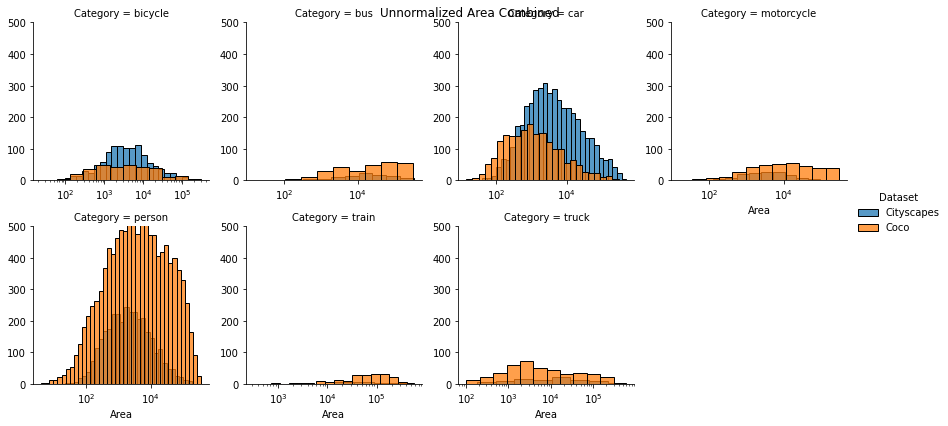

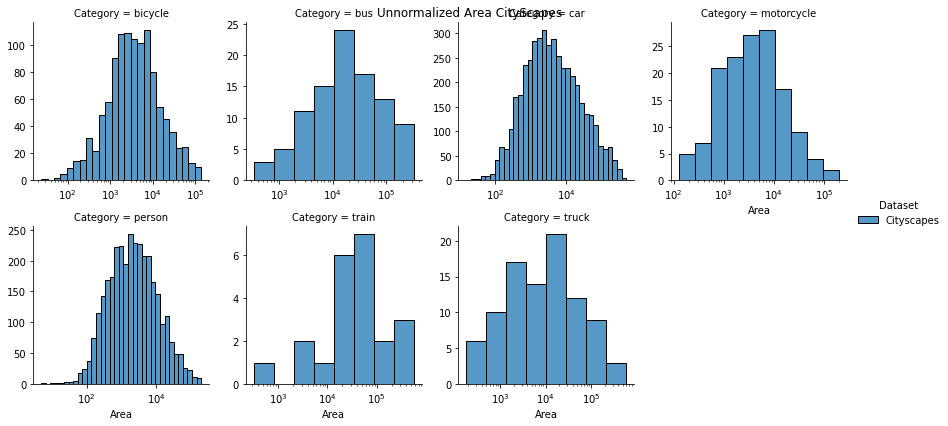

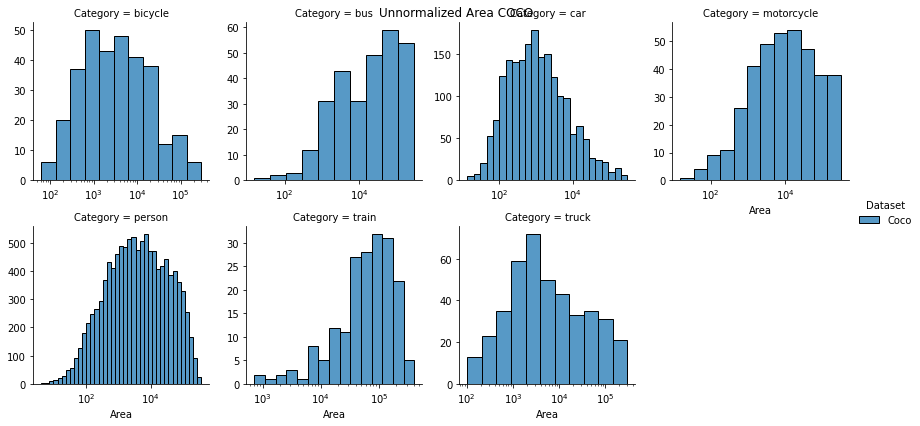

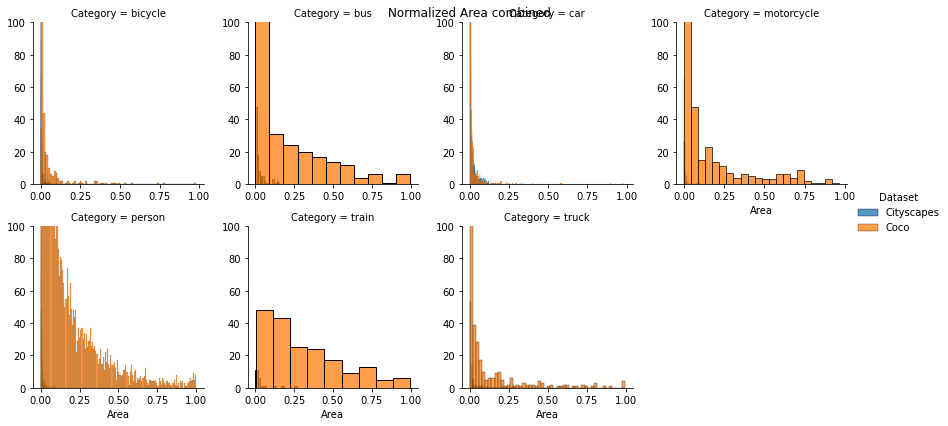

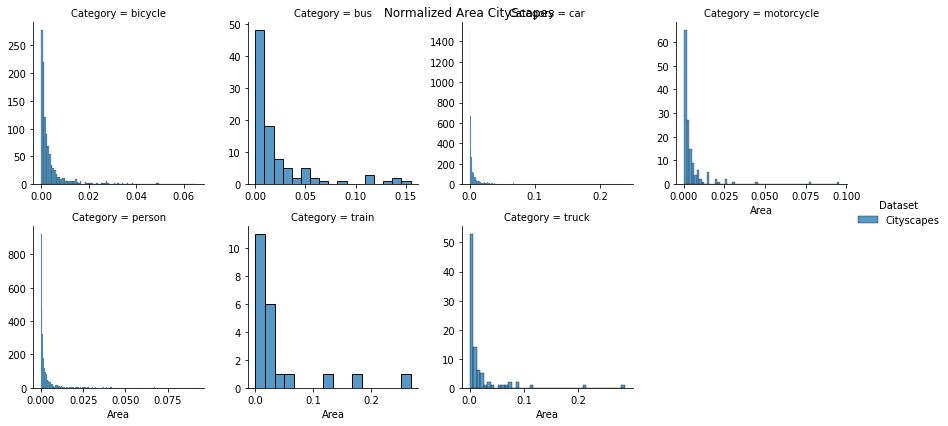

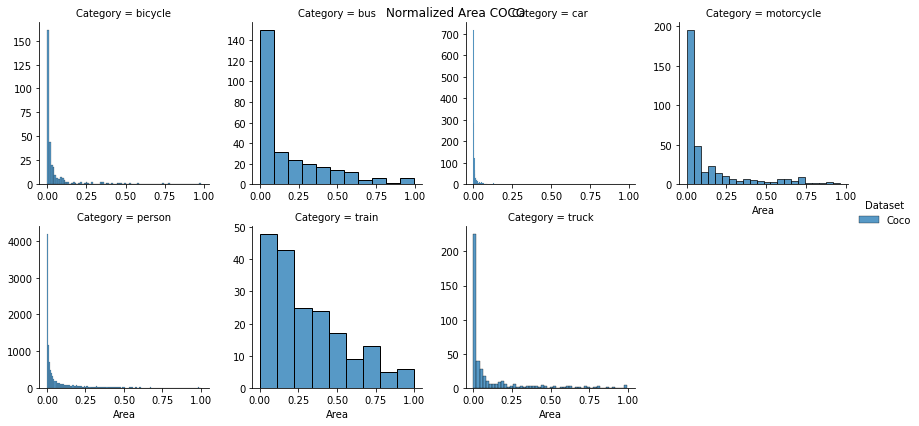

In [173]:
# print(df2.groupby(["Dataset","Category"])["x"].count().reset_index().sort_values(by=["Category"]).plot(kind = 'bar', x ="Category",y="x", ylim=(0,1000)))
# df2.groupby(["Dataset","Category"])["x"].count()

g = sns.FacetGrid(df3.sort_values(["Category"]), col="Category", col_wrap=4, sharey=False, sharex= False, hue = "Dataset", ylim=(0,500))
g.map(sns.histplot, "Area" , log_scale=True)
g.fig.suptitle("Unnormalized Area Combined")
g.add_legend()
plt.savefig("/misc/student/mirfan/output_today/a.jpg")
g = sns.FacetGrid(df3[df3["Dataset"] == "Cityscapes"].sort_values(["Category"]), col="Category", col_wrap=4, sharey=False, sharex= False, hue = "Dataset")
g.map(sns.histplot, "Area" , log_scale=True)
g.fig.suptitle("Unnormalized Area CityScapes")
g.add_legend()
plt.savefig("/misc/student/mirfan/output_today/b.jpg")
g = sns.FacetGrid(df3[df3["Dataset"] == "Coco"].sort_values(["Category"]), col="Category", col_wrap=4, sharey=False, sharex= False, hue = "Dataset")
g.map(sns.histplot, "Area" , log_scale=True)
g.add_legend()
g.fig.suptitle("Unnormalized Area COCO")
plt.savefig("/misc/student/mirfan/output_today/c.jpg")


g = sns.FacetGrid(df2.sort_values(["Category"]), col="Category", col_wrap=4, sharey=False, sharex= False, hue = "Dataset", ylim=(0,100))
g.map(sns.histplot, "Area" , log_scale=False)
g.add_legend()
g.fig.suptitle("Normalized Area combined")
plt.savefig("/misc/student/mirfan/output_today/d.jpg")
g = sns.FacetGrid(df2[df2["Dataset"] == "Cityscapes"].sort_values(["Category"]), col="Category", col_wrap=4, sharey=False, sharex= False, hue = "Dataset")
g.map(sns.histplot, "Area" , log_scale=False)
g.add_legend()
g.fig.suptitle("Normalized Area CityScapes")
plt.savefig("/misc/student/mirfan/output_today/e.jpg")
g = sns.FacetGrid(df2[df2["Dataset"] == "Coco"].sort_values(["Category"]), col="Category", col_wrap=4, sharey=False, sharex= False, hue = "Dataset")
g.map(sns.histplot, "Area" , log_scale=False)
g.add_legend()
g.fig.suptitle("Normalized Area COCO")
plt.savefig("/misc/student/mirfan/output_today/f.jpg")


# print(df2.groupby(["Dataset","Category"])["Area"].describe())

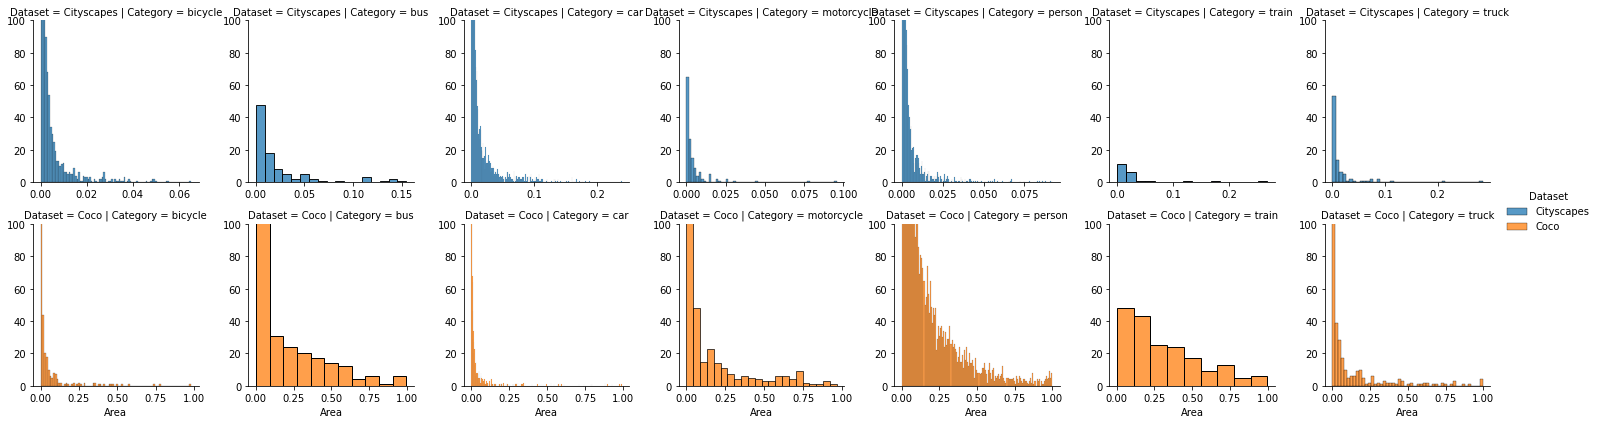

In [172]:
g = sns.FacetGrid(df2.sort_values(["Category"]), row="Dataset",col="Category", sharey=False, sharex= False, hue = "Dataset")
g.map(sns.histplot, "Area" , log_scale=False)
g.add_legend()
# g.fig.suptitle("Normalized Area combined")
plt.savefig("/misc/student/mirfan/output_today/gg.jpg")


In [157]:
# print(((df2["Area"]*100).groupby(["Dataset","Category"])["Area"]).describe())
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df1 = df2.copy(deep = True)
df1["Area"] = df1["Area"].apply(lambda x: x*100)
print(df1.groupby(["Dataset","Category"])["Area"].describe().iloc[:,:4])



                          count   mean    std   min
Dataset    Category                                
Cityscapes bicycle     1115.000  0.446  0.784 0.001
           bus           97.000  2.298  3.476 0.016
           car         4524.000  0.919  2.093 0.001
           motorcycle   143.000  0.532  1.177 0.006
           person      3278.000  0.354  0.813 0.000
           train         22.000  4.071  6.658 0.015
           truck         92.000  1.866  4.162 0.009
Coco       bicycle      316.000  5.472 12.191 0.020
           bus          285.000 19.265 23.827 0.006
           car         1932.000  2.639  8.707 0.005
           motorcycle   371.000 14.136 21.565 0.006
           person     11004.000  8.203 15.501 0.001
           train        190.000 31.235 24.871 0.263
           truck        415.000  9.898 18.930 0.038


In [163]:

pd.set_option('display.float_format', lambda x: '%.0f' % x)
print(df3.groupby(["Dataset","Category"])["Area"].describe().iloc[:,:4])

pd.set_option('display.float_format', lambda x: '%.4f' % x)


                       count  mean    std  min
Dataset    Category                           
Cityscapes bicycle      1115  9363  16440   24
           bus            97 48191  72889  338
           car          4524 19278  43890   16
           motorcycle    143 11158  24682  128
           person       3278  7416  17047    5
           train          22 85373 139629  324
           truck          92 39138  87289  182
Coco       bicycle       316 15400  36828   62
           bus           285 55275  69295   15
           car          1932  7050  23214   14
           motorcycle    371 39004  61829   15
           person      11004 22234  42643    4
           train         190 89964  75598  714
           truck         415 26804  51374  103


In [84]:
print(cityscapes["images"][0].keys())
print(cityscapes["annotations"][0].keys())
print(cityscapes["annotations"][0]["image_id"])
print(cityscapes["images"][0]["width"])
print(cityscapes["images"][0]["height"])

dict_keys(['id', 'width', 'height', 'file_name', 'seg_file_name'])
dict_keys(['id', 'image_id', 'segmentation', 'category_id', 'iscrowd', 'area', 'bbox'])
2975
2048
1024


In [166]:

print(df1.groupby(["Dataset","Category"])["Area"].median())

Dataset     Category  
Cityscapes  bicycle       0.1637
            bus           0.9313
            car           0.1726
            motorcycle    0.1846
            person        0.0970
            train         1.7034
            truck         0.4297
Coco        bicycle       1.1370
            bus           7.7844
            car           0.3463
            motorcycle    3.4117
            person        1.4881
            train        24.4882
            truck         1.6926
Name: Area, dtype: float64
